В этом файле содержится краткий отчёт о проделанной работе. Основной код написан на С++ и находится в файле main.cpp в той же директории. Все используемые изображения находятся в папке images. Директория bash_build предназаначена для сборки через cmake. CMakeLists.txt так же лежит в этой же директории.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

У написанной программы несколько режимов работы:
1) пройтись по заданному изображению одним из алгоритмов фильтрации с фиксированным радиусом. Результат сохраняется в файл.

2) запустит на некотором файле замер времени для фиксированного фильтра: программа переберёт все радиусы от 1 до 99 включительно, посчитает и выведет время работы в секундах для каждого из них, но ничего сохранять не будет.

3) сравнить результаты работы для фиксированного изображения и фиксированного радиуса фильтра. Программа запустит все 4 алгоритма, выведет их время работы, а потом попиксельно сравнит результаты. В случае несовпадения будет выведено, какие именно 2 пикселя не совпали и после работы каких алгоритмов это случилось.

4) сравнить результаты работы для фиксированного изображения и фиксированного радиуса фильтра и сохранить результаты. Будет сделано то же, что в пункте 3, но попытаемся записать результаты в заданные пользователем дополнительные 4 файла.

Собираем в директории bash_build через cmake:
    
cmake ..

cmake --build .

Несколько примеров на фильтрацию. Все команды запускались из директории bash_build.

./task_2 -sort ../images/trees.jpg ../images/trees_naive.jpg 4

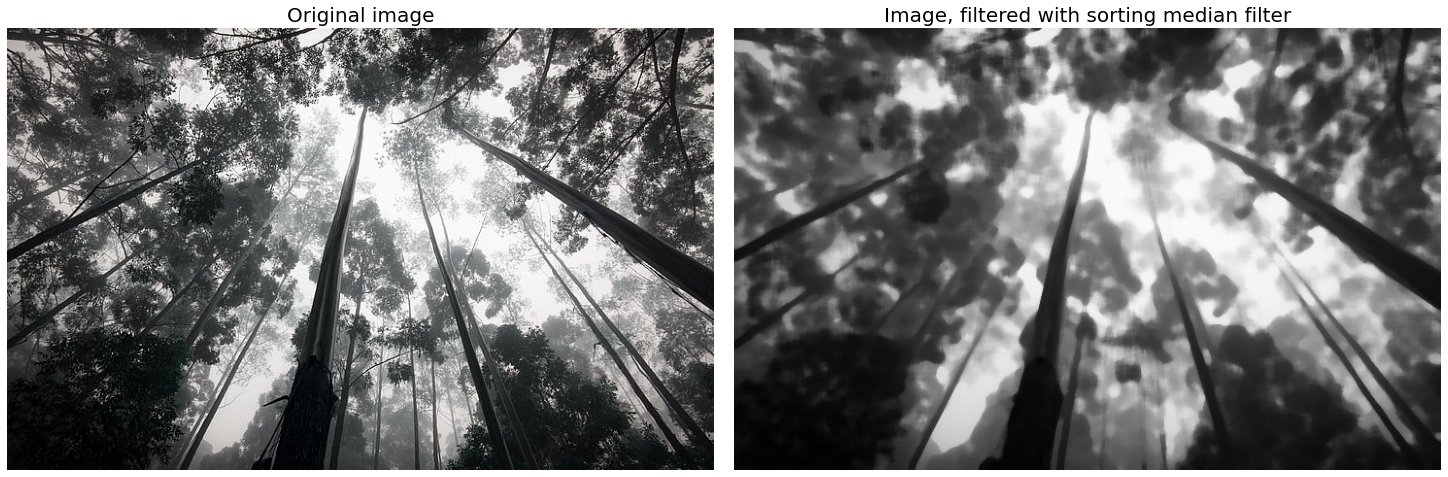

In [14]:
trees_or = cv2.imread("images/trees.jpg")
trees_f = cv2.imread("images/trees_naive.jpg")
fig, axs = plt.subplots(1, 2, constrained_layout = True, 
                                figsize = (20, 14))
axs[0].axis("off")
axs[0].set_title("Original image", fontsize = 20)
axs[0].imshow(trees_or);
axs[1].axis("off")
axs[1].set_title("Image, filtered with sorting median filter", fontsize = 20)
axs[1].imshow(trees_f);

./task_2 -huang ../images/butterfly.jpg ../images/butterfly_huang.jpg 15

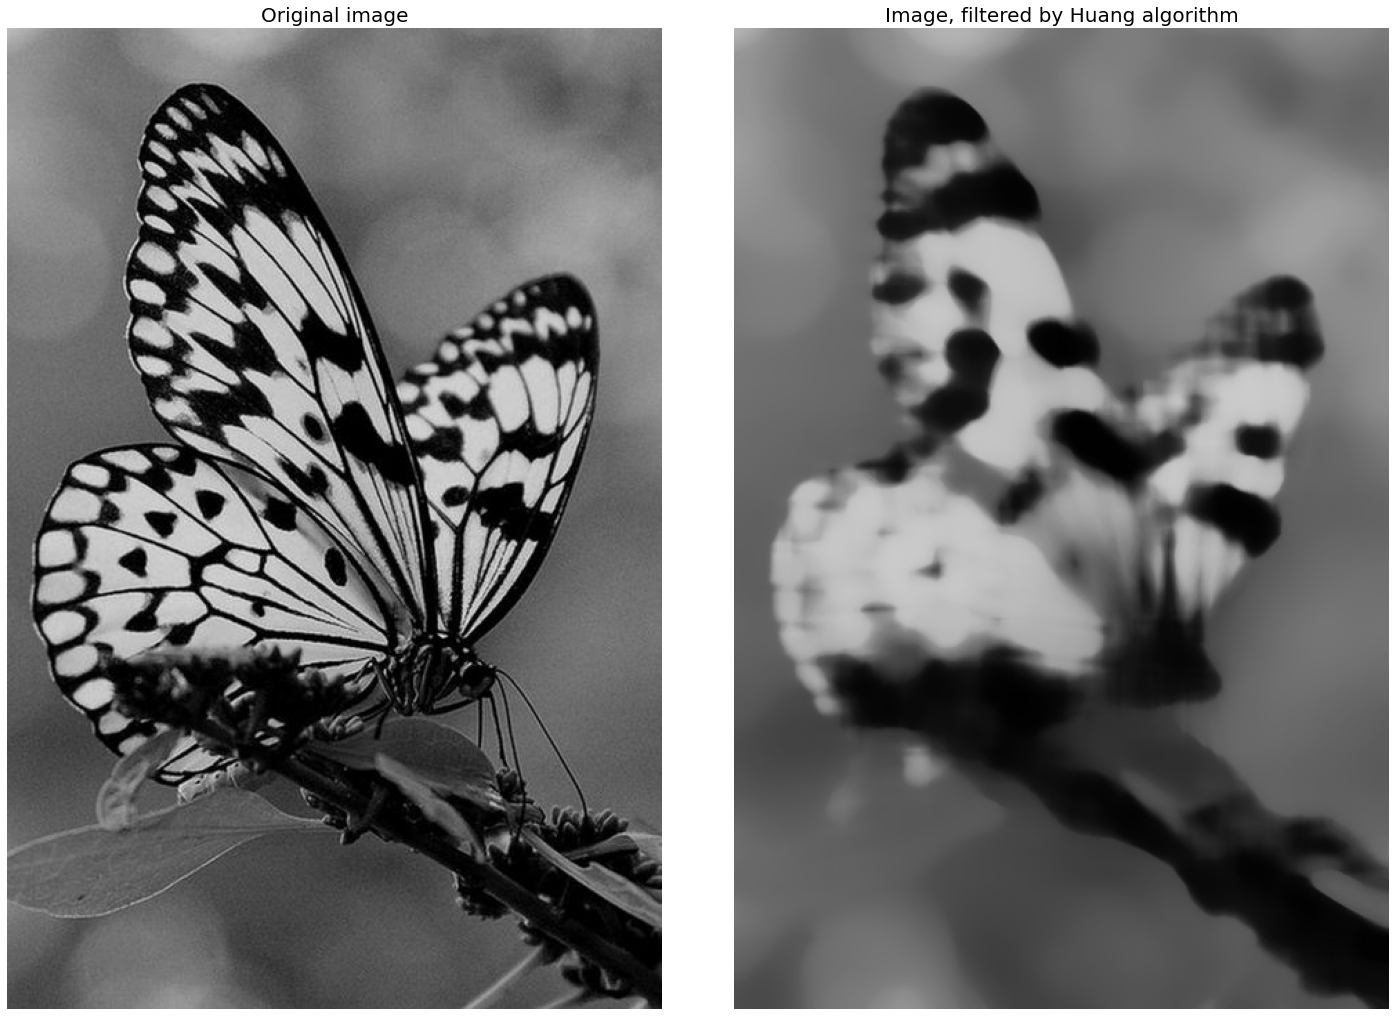

In [16]:
butterfly_or = cv2.imread("images/butterfly.jpg")
butterfly_f = cv2.imread("images/butterfly_huang.jpg")
fig, axs = plt.subplots(1, 2, constrained_layout = True, 
                                figsize = (20, 14))
axs[0].axis("off")
axs[0].set_title("Original image", fontsize = 20)
axs[0].imshow(butterfly_or);
axs[1].axis("off")
axs[1].set_title("Image, filtered by Huang algorithm", fontsize = 20)
axs[1].imshow(butterfly_f);

./task_2 -perreault ../images/leaf.jpg ../images/leaf_perreault.jpg 2

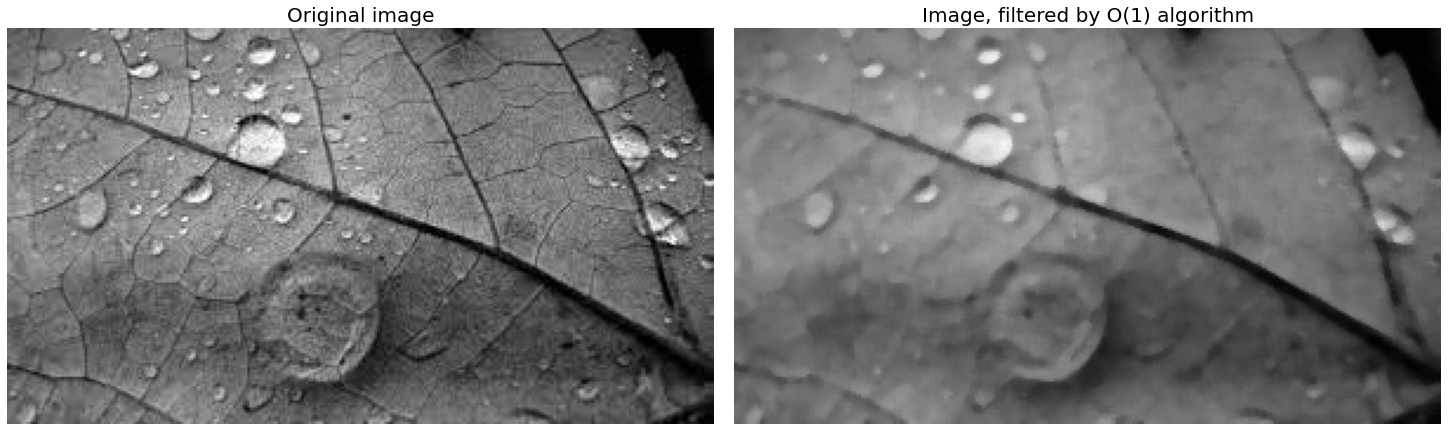

In [18]:
leaf_or = cv2.imread("images/leaf.jpg")
leaf_f = cv2.imread("images/leaf_perreault.jpg")
fig, axs = plt.subplots(1, 2, constrained_layout = True, 
                                figsize = (20, 14))
axs[0].axis("off")
axs[0].set_title("Original image", fontsize = 20)
axs[0].imshow(leaf_or);
axs[1].axis("off")
axs[1].set_title("Image, filtered by O(1) algorithm", fontsize = 20)
axs[1].imshow(leaf_f);

Итак, алгоритмы работают. Сделаем сравнение с помощью опции -compare.

**Характеристики системы:**

Получены командой sudo lshw -short

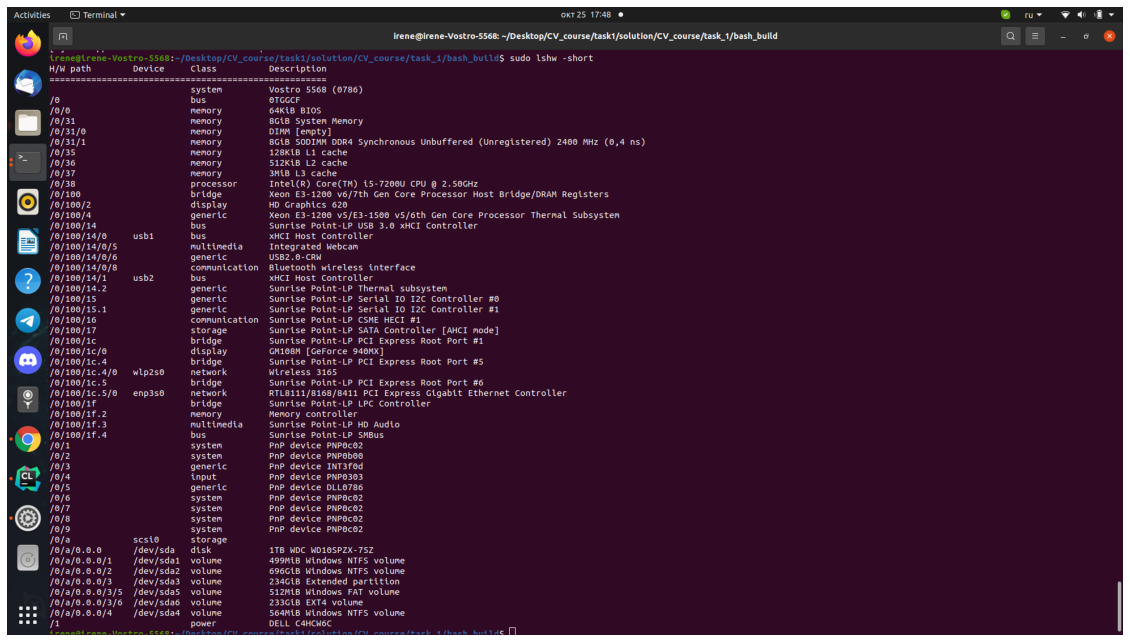

In [3]:
img_info = cv2.imread("system_info.png")
img_info = cv2.cvtColor(img_info, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(img_info)

**Сравнение алгоритмов** 

./task_2 -compare ../images/feathers.jpg 13 ../images/feathers_opencv.jpg ../images/feathers_naive.jpg ../images/feathers_huang.jpg ../images/features_perreault.jpg

Вывод:

opencv time in seconds = 0.030615

sorting algorithm time in seconds = 6.42176

huang algorithm time in seconds = 0.117868

perreault (O(1)) algorithm time in seconds = 0.912113

All 4 results are similar and written to the corresponding files

Как видно, быстрее всего отработал алгоритм из библиотеки opencv, а дольше всего работал алгоритм с пересчётом медианы через сортировку. Трюк с порядковой статистикой в сортировке не особо помог. Заметим особенность: алгоритм Huang работает куда быстрее, чем Perreault, который должен бы работать за O(1).

Тем не менее программа сообщает, что все пиксели получились одинаковыми. Можно ещё визуально сравнить получившиеся изображения:

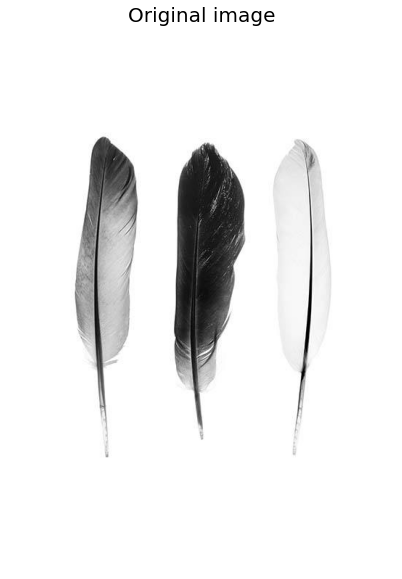

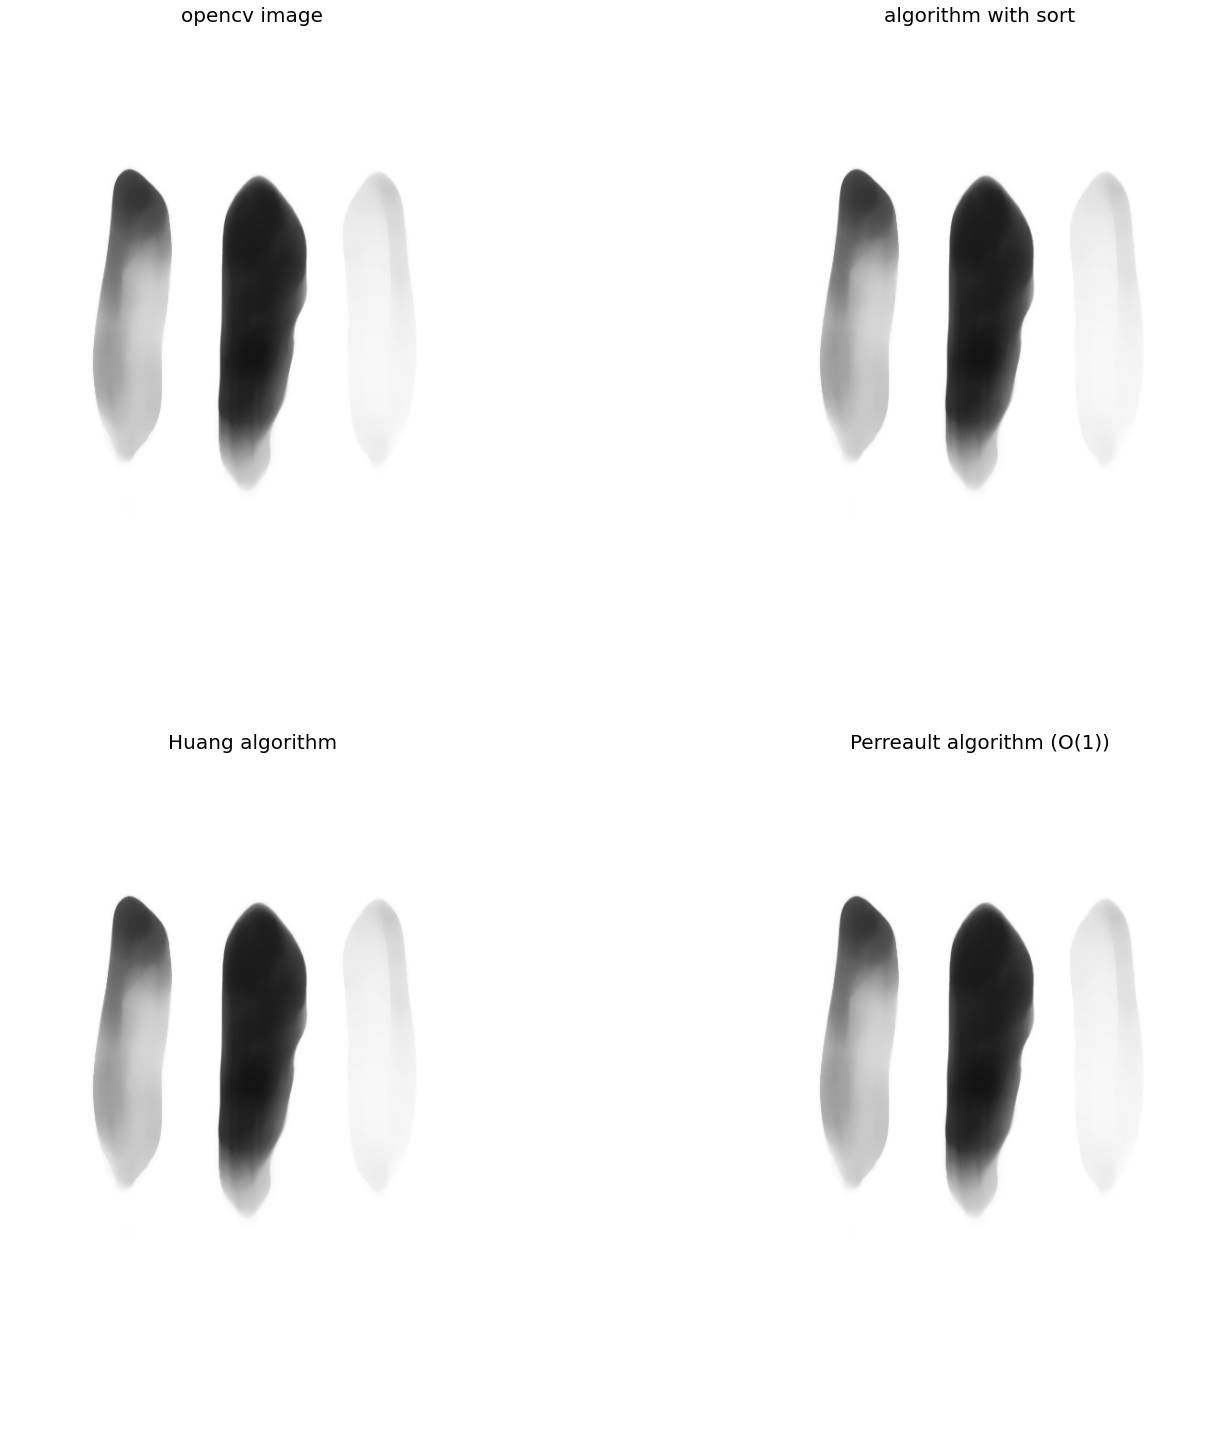

In [33]:
feathers_or = cv2.imread("images/feathers.jpg")
feathers_cv = cv2.imread("images/feathers_opencv.jpg")
feathers_naive = cv2.imread("images/feathers_naive.jpg")
feathers_huang = cv2.imread("images/feathers_huang.jpg")
feathers_perr = cv2.imread("images/feathers_perreault.jpg")

plt.figure(figsize = (10, 10))
plt.axis("off")
plt.title("Original image", fontsize = 20)
plt.imshow(feathers_or);


fig, axs = plt.subplots(2, 2, constrained_layout = True, 
                                figsize = (20, 20))
axs[0][0].axis("off")
axs[0][0].set_title("opencv image", fontsize = 20)
axs[0][0].imshow(feathers_cv);

axs[0][1].axis("off")
axs[0][1].set_title("algorithm with sort", fontsize = 20)
axs[0][1].imshow(feathers_naive);

axs[1][0].axis("off")
axs[1][0].set_title("Huang algorithm", fontsize = 20)
axs[1][0].imshow(feathers_huang);

axs[1][1].axis("off")
axs[1][1].set_title("Perreault algorithm (O(1))", fontsize = 20)
axs[1][1].imshow(feathers_perr);

Попробуем на других данных:
    
./task_2 -compare ../images/eagle.jpg 17 ../images/eagle_opencv.jpg ../images/eagle_naive.jpg ../images/eagle_huang.jpg ../images/eagle_perreault.jpg

Вывод:

opencv time in seconds = 0.028555

sorting algorithm time in seconds = 18.8666

huang algorithm time in seconds = 0.292954

perreault (O(1)) algorithm time in seconds = 1.13599

All 4 results are similar and written to the corresponding files

Та же ситуация: библиотечный алгоритм очень быстрый. Обычная сортировка самая медленная и на её работу уходят секунды. Алгоритм Huang куда быстрее, чем алгоритм Perreault, у которого предполагаемое время работы O(1).

Смотрим на результат

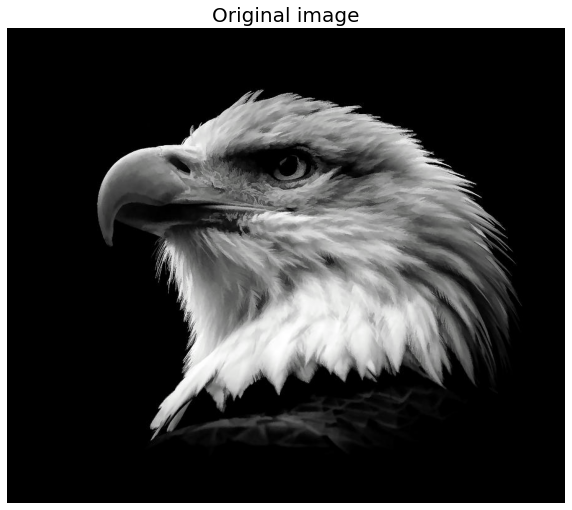

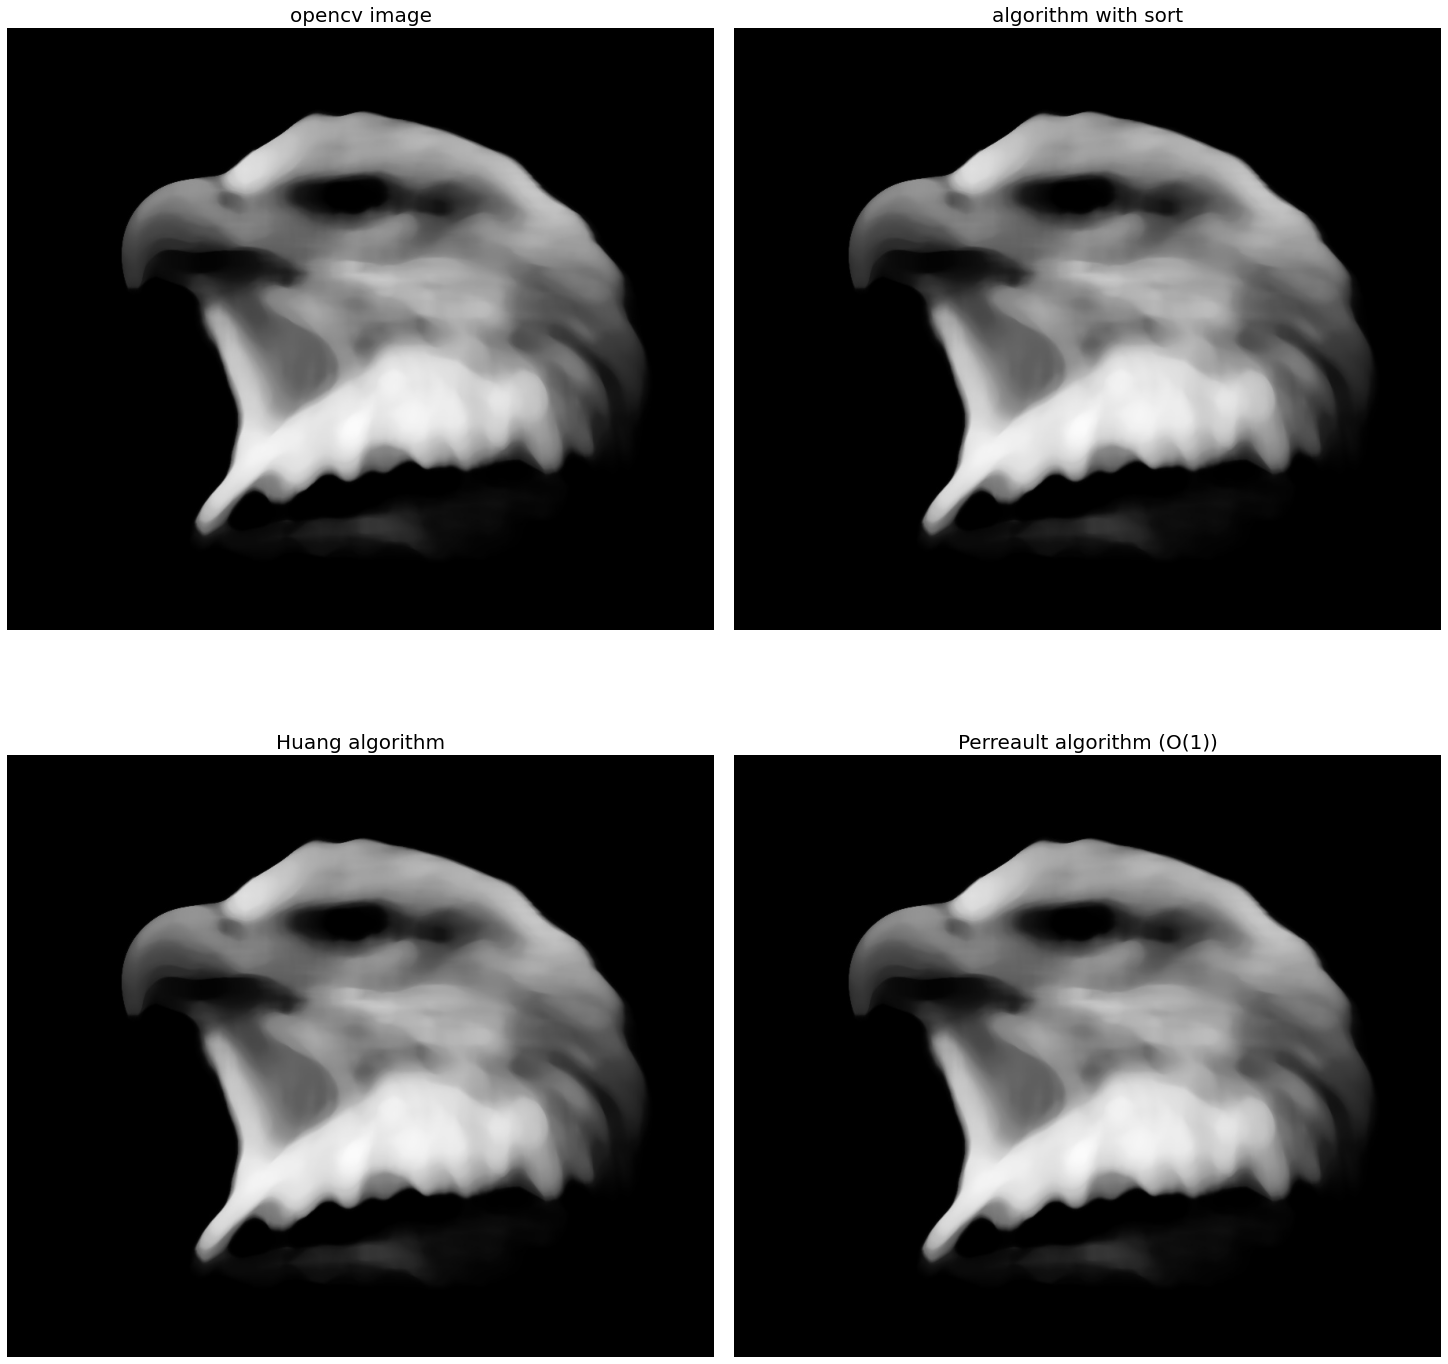

In [34]:
eagle_or = cv2.imread("images/eagle.jpg")
eagle_cv = cv2.imread("images/eagle_opencv.jpg")
eagle_naive = cv2.imread("images/eagle_naive.jpg")
eagle_huang = cv2.imread("images/eagle_huang.jpg")
eagle_perr = cv2.imread("images/eagle_perreault.jpg")

plt.figure(figsize = (10, 10))
plt.axis("off")
plt.title("Original image", fontsize = 20)
plt.imshow(eagle_or);


fig, axs = plt.subplots(2, 2, constrained_layout = True, 
                                figsize = (20, 20))
axs[0][0].axis("off")
axs[0][0].set_title("opencv image", fontsize = 20)
axs[0][0].imshow(eagle_cv);

axs[0][1].axis("off")
axs[0][1].set_title("algorithm with sort", fontsize = 20)
axs[0][1].imshow(eagle_naive);

axs[1][0].axis("off")
axs[1][0].set_title("Huang algorithm", fontsize = 20)
axs[1][0].imshow(eagle_huang);

axs[1][1].axis("off")
axs[1][1].set_title("Perreault algorithm (O(1))", fontsize = 20)
axs[1][1].imshow(eagle_perr);

Построим графики и попытаемся разобраться с **временем работы**.

Сначала я возьму самую маленькую картинку и запушу измерение времени для неё.

./task_2 -sort ../images/leaf.jpg

Вывод

Times for naive median filter with assortment:

0.090606, 0.198043, 0.346761, 0.538703, 0.770111, 1.03991, 1.35691, 1.70609, 2.11888, 2.54987, 3.00076, 3.52562, 4.0684, 4.65494, 5.28767, 5.97418, 6.65222, 7.60808, 8.24181, 9.02418, 9.9227, 10.7263, 11.7002, 12.6387, 13.6751, 14.7349, 15.846, 16.8952, 18.0951, 20.3715, 20.6862, 21.8402, 23.156, 24.5571, 25.9613, 27.4407, 29.0209, 30.4787, 32.0455, 33.6519, 35.2593, 37.2094, 38.6637, 40.6625, 42.7625, 44.1765, 45.9559, 47.9031, 49.8193, 51.8316, 53.867, 55.8884, 58.2059, 60.1593, 62.3814, 64.7123, 66.8616, 69.0216, 71.5801, 73.8224, 76.2853, 78.6722, 81.2778, 83.6433, 86.384, 88.8529, 91.5542, 94.3745, 96.7499, 99.54, 102.301, 105.548, 108.808, 110.907, 113.494, 116.5, 119.488, 122.759, 125.665, 128.811, 131.958, 135.039, 138.691, 141.599, 145.235, 147.848, 151.326, 154.434, 157.538, 161.058, 164.044, 167.292, 170.0,

./task_2 -huang ../images/leaf.jpg

Вывод

Times for Huang median filter:

0.026043, 0.016594, 0.014043, 0.017244, 0.019274, 0.022548, 0.026407, 0.02978, 0.032137, 0.035005, 0.036757, 0.039626, 0.04255, 0.045569, 0.048862, 0.052441, 0.053611, 0.056494, 0.059261, 0.062217, 0.065238, 0.069686, 0.071401, 0.07706, 0.08303, 0.091605, 0.091161, 0.090936, 0.090458, 0.092632, 0.096931, 0.101078, 0.104252, 0.107174, 0.112273, 0.113402, 0.118784, 0.122321, 0.12131, 0.124604, 0.129416, 0.133236, 0.142341, 0.139786, 0.146379, 0.149064, 0.155272, 0.160726, 0.161659, 0.166438, 0.16636, 0.17272, 0.179341, 0.182832, 0.18935, 0.185281, 0.2098, 0.238816, 0.211371, 0.207763, 0.214105, 0.212863, 0.214407, 0.220382, 0.283728, 0.229164, 0.236642, 0.260692, 0.245633, 0.258913, 0.246878, 0.254312, 0.250937, 0.258125, 0.269729, 0.294786, 0.276966, 0.273397, 0.283309, 0.282754, 0.292009, 0.30422, 0.303243, 0.303185, 0.30312, 0.317336, 0.321808, 0.322945, 0.321925, 0.329239, 0.378744, 0.334225, 0.37925, 0.36728, 0.392364, 0.352759, 0.429152, 0.451577, 0.523568,

./task_2 -perreault ../images/leaf.jpg

Вывод

Times for Perrault median filter that claimed to be O(1):

0.114056, 0.094327, 0.094321, 0.092704, 0.093094, 0.095611, 0.094222, 0.094683, 0.094926, 0.095192, 0.09601, 0.096803, 0.098729, 0.098619, 0.098552, 0.098938, 0.099042, 0.099801, 0.100947, 0.100865, 0.101581, 0.103944, 0.103653, 0.106606, 0.105639, 0.104933, 0.104209, 0.1062, 0.106919, 0.106938, 0.109229, 0.108812, 0.108384, 0.108531, 0.113846, 0.116547, 0.115198, 0.112925, 0.114806, 0.116126, 0.116434, 0.118234, 0.120203, 0.117989, 0.117366, 0.116943, 0.116042, 0.115944, 0.115542, 0.116183, 0.116833, 0.150988, 0.118655, 0.118439, 0.118034, 0.119425, 0.152391, 0.120651, 0.120976, 0.122463, 0.125898, 0.127743, 0.128852, 0.126217, 0.129887, 0.125529, 0.127165, 0.126936, 0.125942, 0.129653, 0.126425, 0.126937, 0.127069, 0.128406, 0.12854, 0.128189, 0.12874, 0.130643, 0.130314, 0.130275, 0.1329, 0.131465, 0.131405, 0.132721, 0.132656, 0.135999, 0.133592, 0.134914, 0.134396, 0.135942, 0.135172, 0.135687, 0.136761, 0.140421, 0.13856, 0.139096, 0.140386, 0.141245, 0.141198, 

./task_2 -opencv ../images/leaf.jpg

Вывод

Times for opencv medianBlur:

0.000993, 0.004139, 0.007633, 0.003047, 0.003073, 0.003668, 0.004114, 0.002109, 0.002106, 0.002178, 0.002149, 0.002395, 0.002671, 0.002449, 0.002138, 0.002116, 0.001484, 0.001503, 0.001444, 0.001439, 0.00148, 0.001503, 0.00154, 0.001469, 0.001537, 0.001523, 0.001562, 0.002123, 0.002102, 0.002212, 0.001637, 0.001771, 0.001546, 0.001677, 0.001922, 0.002036, 0.001994, 0.002014, 0.001676, 0.001559, 0.001497, 0.001463, 0.001452, 0.001478, 0.00146, 0.001461, 0.001527, 0.001471, 0.001464, 0.001477, 0.001708, 0.002226, 0.002098, 0.001657, 0.001718, 0.002058, 0.002438, 0.001846, 0.00189, 0.001566, 0.001541, 0.001552, 0.001589, 0.001552, 0.001577, 0.001596, 0.001555, 0.001566, 0.001562, 0.001629, 0.001728, 0.001877, 0.002172, 0.002881, 0.002386, 0.002317, 0.001789, 0.001647, 0.001628, 0.001642, 0.001684, 0.001627, 0.001674, 0.001623, 0.001635, 0.001661, 0.001708, 0.001968, 0.002042, 0.002356, 0.001711, 0.00207, 0.002465, 0.001958, 0.001864, 0.001683, 0.001723, 0.001707, 0.001754, 

Построю график со всеми временами сразу:

In [42]:
grid = np.linspace(1, 99, 99)
naive = np.array([0.090606, 0.198043, 0.346761, 0.538703, 0.770111, 1.03991, 
                  1.35691, 1.70609, 2.11888, 2.54987, 3.00076, 3.52562, 4.0684, 
                  4.65494, 5.28767, 5.97418, 6.65222, 7.60808, 8.24181, 
                  9.02418, 9.9227, 10.7263, 11.7002, 12.6387, 13.6751, 14.7349, 
                  15.846, 16.8952, 18.0951, 20.3715, 20.6862, 21.8402, 23.156, 
                  24.5571, 25.9613, 27.4407, 29.0209, 30.4787, 32.0455, 
                  33.6519, 35.2593, 37.2094, 38.6637, 40.6625, 42.7625, 
                  44.1765, 45.9559, 47.9031, 49.8193, 51.8316, 53.867, 55.8884, 
                  58.2059, 60.1593, 62.3814, 64.7123, 66.8616, 69.0216, 
                  71.5801, 73.8224, 76.2853, 78.6722, 81.2778, 83.6433, 86.384, 
                  88.8529, 91.5542, 94.3745, 96.7499, 99.54, 102.301, 105.548, 
                  108.808, 110.907, 113.494, 116.5, 119.488, 122.759, 125.665, 
                  128.811, 131.958, 135.039, 138.691, 141.599, 145.235, 
                  147.848, 151.326, 154.434, 157.538, 161.058, 164.044, 
                  167.292, 170.0, 173.012, 176.223, 179.261, 182.408, 185.85, 
                 189.108])

huang = np.array([0.026043, 0.016594, 0.014043, 0.017244, 0.019274, 0.022548, 
                  0.026407, 0.02978, 0.032137, 0.035005, 0.036757, 0.039626, 
                  0.04255, 0.045569, 0.048862, 0.052441, 0.053611, 0.056494, 
                  0.059261, 0.062217, 0.065238, 0.069686, 0.071401, 0.07706, 
                  0.08303, 0.091605, 0.091161, 0.090936, 0.090458, 0.092632, 
                  0.096931, 0.101078, 0.104252, 0.107174, 0.112273, 0.113402, 
                  0.118784, 0.122321, 0.12131, 0.124604, 0.129416, 0.133236, 
                  0.142341, 0.139786, 0.146379, 0.149064, 0.155272, 0.160726, 
                  0.161659, 0.166438, 0.16636, 0.17272, 0.179341, 0.182832, 
                  0.18935, 0.185281, 0.2098, 0.238816, 0.211371, 0.207763, 
                  0.214105, 0.212863, 0.214407, 0.220382, 0.283728, 0.229164, 
                  0.236642, 0.260692, 0.245633, 0.258913, 0.246878, 0.254312, 
                  0.250937, 0.258125, 0.269729, 0.294786, 0.276966, 0.273397, 
                  0.283309, 0.282754, 0.292009, 0.30422, 0.303243, 0.303185, 
                  0.30312, 0.317336, 0.321808, 0.322945, 0.321925, 0.329239, 
                  0.378744, 0.334225, 0.37925, 0.36728, 0.392364, 0.352759, 
                  0.429152, 0.451577, 0.523568])

perreault = np.array([0.114056, 0.094327, 0.094321, 0.092704, 0.093094, 
                      0.095611, 0.094222, 0.094683, 0.094926, 0.095192, 
                      0.09601, 0.096803, 0.098729, 0.098619, 0.098552, 
                      0.098938, 0.099042, 0.099801, 0.100947, 0.100865, 
                      0.101581, 0.103944, 0.103653, 0.106606, 0.105639, 
                      0.104933, 0.104209, 0.1062, 0.106919, 0.106938, 0.109229, 
                      0.108812, 0.108384, 0.108531, 0.113846, 0.116547, 
                      0.115198, 0.112925, 0.114806, 0.116126, 0.116434, 
                      0.118234, 0.120203, 0.117989, 0.117366, 0.116943, 
                      0.116042, 0.115944, 0.115542, 0.116183, 0.116833, 
                      0.150988, 0.118655, 0.118439, 0.118034, 0.119425, 
                      0.152391, 0.120651, 0.120976, 0.122463, 0.125898, 
                      0.127743, 0.128852, 0.126217, 0.129887, 0.125529, 
                      0.127165, 0.126936, 0.125942, 0.129653, 0.126425, 
                      0.126937, 0.127069, 0.128406, 0.12854, 0.128189, 0.12874, 
                      0.130643, 0.130314, 0.130275, 0.1329, 0.131465, 0.131405, 
                      0.132721, 0.132656, 0.135999, 0.133592, 0.134914, 
                      0.134396, 0.135942, 0.135172, 0.135687, 0.136761, 
                      0.140421, 0.13856, 0.139096, 0.140386, 0.141245, 
                      0.141198])

cv = np.array([0.000993, 0.004139, 0.007633, 0.003047, 0.003073, 0.003668, 
               0.004114, 0.002109, 0.002106, 0.002178, 0.002149, 0.002395, 
               0.002671, 0.002449, 0.002138, 0.002116, 0.001484, 0.001503, 
               0.001444, 0.001439, 0.00148, 0.001503, 0.00154, 0.001469, 
               0.001537, 0.001523, 0.001562, 0.002123, 0.002102, 0.002212, 
               0.001637, 0.001771, 0.001546, 0.001677, 0.001922, 0.002036, 
               0.001994, 0.002014, 0.001676, 0.001559, 0.001497, 0.001463, 
               0.001452, 0.001478, 0.00146, 0.001461, 0.001527, 0.001471, 
               0.001464, 0.001477, 0.001708, 0.002226, 0.002098, 0.001657, 
               0.001718, 0.002058, 0.002438, 0.001846, 0.00189, 0.001566, 
               0.001541, 0.001552, 0.001589, 0.001552, 0.001577, 0.001596, 
               0.001555, 0.001566, 0.001562, 0.001629, 0.001728, 0.001877, 
               0.002172, 0.002881, 0.002386, 0.002317, 0.001789, 0.001647, 
               0.001628, 0.001642, 0.001684, 0.001627, 0.001674, 0.001623, 
               0.001635, 0.001661, 0.001708, 0.001968, 0.002042, 0.002356, 
               0.001711, 0.00207, 0.002465, 0.001958, 0.001864, 0.001683, 
               0.001723, 0.001707, 0.001754,])


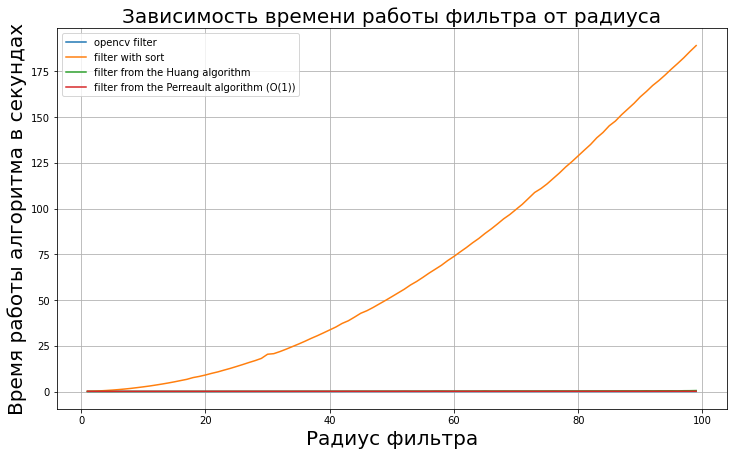

In [47]:
plt.figure(figsize = (12, 7))
plt.plot(grid, cv, label = 'opencv filter')
plt.plot(grid, naive, label = 'filter with sort')
plt.plot(grid, huang, label = 'filter from the Huang algorithm')
plt.plot(grid, perreault, label = 'filter from the Perreault algorithm (O(1))')
plt.title('Зависимость времени работы фильтра от радиуса', fontsize = 20)
plt.xlabel('Радиус фильтра', fontsize = 20)
plt.ylabel('Время работы алгоритма в секундах', fontsize = 20)
plt.legend()
plt.grid(True)
plt.show()

Тут всё очевидно: фильтер с обычной сортировкой работает ужасно долго. Даже трюк с поиском медианы как порядковой статистики не помогает. Поэтому дальше я просто исключу этот фильтр из рассмотрения и возьму картинку побольше.

Я буду использовать самую первую картинку с деревьями. Она достаточно большая (728 Х 455) и сложная.

./task_2 -opencv ../images/trees.jpg

Вывод:

Times for opencv medianBlur:

0.000614, 0.001911, 0.019363, 0.013993, 0.016175, 0.01744, 0.019282, 0.013385, 0.013641, 0.013125, 0.013622, 0.013049, 0.013185, 0.013231, 0.012881, 0.013511, 0.012846, 0.013273, 0.013105, 0.012686, 0.013687, 0.013417, 0.013751, 0.012505, 0.013579, 0.012556, 0.012329, 0.01286, 0.012281, 0.012401, 0.01267, 0.012204, 0.012693, 0.012165, 0.012206, 0.012086, 0.011965, 0.012205, 0.012265, 0.012057, 0.012813, 0.012383, 0.013321, 0.011783, 0.012787, 0.012364, 0.011662, 0.012262, 0.011737, 0.011537, 0.012122, 0.011762, 0.012203, 0.011894, 0.011637, 0.012504, 0.011502, 0.011586, 0.012021, 0.011547, 0.012413, 0.012056, 0.011371, 0.012161, 0.01137, 0.01132, 0.012882, 0.011274, 0.012371, 0.011393, 0.011249, 0.012362, 0.011403, 0.011618, 0.012026, 0.011383, 0.011913, 0.01178, 0.011409, 0.012607, 0.012018, 0.011645, 0.012557, 0.011506, 0.012985, 0.011448, 0.011296, 0.012102, 0.011426, 0.011933, 0.011427, 0.01138, 0.01228, 0.011555, 0.011565, 0.011916, 0.011629, 0.012623, 0.01183,

./task_2 -huang ../images/trees.jpg

Вывод:

Times for Huang median filter:

0.062294, 0.076851, 0.092909, 0.109029, 0.125562, 0.142426, 0.162815, 0.179882, 0.200061, 0.213769, 0.231281, 0.249196, 0.265229, 0.283049, 0.299031, 0.316593, 0.333273, 0.350906, 0.366881, 0.383841, 0.40319, 0.432328, 0.449203, 0.456357, 0.474773, 0.492181, 0.509833, 0.52782, 0.545078, 0.565197, 0.582821, 0.623313, 0.641425, 0.723788, 0.662214, 0.684291, 0.74265, 0.726878, 0.749641, 0.779173, 0.7742, 0.783876, 0.802591, 0.822152, 0.869771, 0.859136, 0.880011, 0.897877, 0.913501, 0.938914, 0.962756, 0.978903, 1.00573, 1.03084, 1.05429, 1.08115, 1.09347, 1.17074, 1.25581, 1.22319, 1.18437, 1.18471, 1.20985, 1.23183, 1.25401, 1.28317, 1.29074, 1.31346, 1.3439, 1.34918, 1.37711, 1.40334, 1.42797, 1.44711, 1.4677, 1.48614, 1.5111, 1.53781, 1.55446, 1.57534, 1.59842, 1.61362, 1.65131, 1.65261, 1.68356, 1.70393, 1.72636, 1.7562, 1.77063, 1.796, 1.81703, 1.83411, 1.8542, 1.88017, 1.90975, 1.93481, 2.03821, 1.98302, 2.00799, 

./task_2 -perreault ../images/trees.jpg

Вывод:
    
 Times for Perrault median filter that claimed to be O(1):
 
0.596286, 0.590123, 0.589697, 0.588566, 0.589261, 0.59094, 0.593164, 0.592081, 0.601082, 0.598206, 0.595213, 0.594961, 0.594616, 0.614307, 0.59645, 0.604503, 0.597423, 0.603414, 0.601644, 0.602717, 0.60239, 0.604698, 0.60867, 0.633312, 0.607807, 0.610671, 0.613378, 0.615528, 0.613116, 0.621638, 0.620778, 0.617977, 0.617924, 0.619519, 0.620955, 0.622438, 0.623234, 0.62675, 0.624282, 0.629541, 0.6279, 0.629481, 0.629967, 0.631679, 0.632777, 0.636569, 0.636006, 0.636495, 0.638285, 0.638051, 0.640422, 0.642463, 0.643984, 0.644391, 0.64832, 0.648174, 0.649401, 0.647182, 0.653128, 0.655718, 0.652421, 0.655511, 0.657833, 0.658743, 0.663294, 0.740462, 0.687602, 0.665809, 0.667306, 0.690393, 0.663556, 0.665872, 0.666691, 0.668458, 0.66904, 0.671114, 0.672789, 0.70684, 0.709969, 0.68152, 0.677684, 0.675626, 0.678724, 0.680199, 0.681967, 0.684389, 0.685434, 0.682335, 0.68415, 0.685072, 0.687537, 0.689926, 0.689124, 0.690099, 0.691619, 0.693128, 0.693793, 0.696474, 0.697083,    

In [48]:
grid = np.linspace(1, 99, 99)

cv = np.array([0.000614, 0.001911, 0.019363, 0.013993, 0.016175, 0.01744, 
               0.019282, 0.013385, 0.013641, 0.013125, 0.013622, 0.013049, 
               0.013185, 0.013231, 0.012881, 0.013511, 0.012846, 0.013273, 
               0.013105, 0.012686, 0.013687, 0.013417, 0.013751, 0.012505, 
               0.013579, 0.012556, 0.012329, 0.01286, 0.012281, 0.012401, 
               0.01267, 0.012204, 0.012693, 0.012165, 0.012206, 0.012086, 
               0.011965, 0.012205, 0.012265, 0.012057, 0.012813, 0.012383, 
               0.013321, 0.011783, 0.012787, 0.012364, 0.011662, 0.012262, 
               0.011737, 0.011537, 0.012122, 0.011762, 0.012203, 0.011894, 
               0.011637, 0.012504, 0.011502, 0.011586, 0.012021, 0.011547, 
               0.012413, 0.012056, 0.011371, 0.012161, 0.01137, 0.01132, 
               0.012882, 0.011274, 0.012371, 0.011393, 0.011249, 0.012362, 
               0.011403, 0.011618, 0.012026, 0.011383, 0.011913, 0.01178, 
               0.011409, 0.012607, 0.012018, 0.011645, 0.012557, 0.011506, 
               0.012985, 0.011448, 0.011296, 0.012102, 0.011426, 0.011933, 
               0.011427, 0.01138, 0.01228, 0.011555, 0.011565, 0.011916, 
               0.011629, 0.012623, 0.01183])

huang = np.array([0.062294, 0.076851, 0.092909, 0.109029, 0.125562, 0.142426, 
                  0.162815, 0.179882, 0.200061, 0.213769, 0.231281, 0.249196, 
                  0.265229, 0.283049, 0.299031, 0.316593, 0.333273, 0.350906, 
                  0.366881, 0.383841, 0.40319, 0.432328, 0.449203, 0.456357, 
                  0.474773, 0.492181, 0.509833, 0.52782, 0.545078, 0.565197, 
                  0.582821, 0.623313, 0.641425, 0.723788, 0.662214, 0.684291, 
                  0.74265, 0.726878, 0.749641, 0.779173, 0.7742, 0.783876, 
                  0.802591, 0.822152, 0.869771, 0.859136, 0.880011, 0.897877, 
                  0.913501, 0.938914, 0.962756, 0.978903, 1.00573, 1.03084, 
                  1.05429, 1.08115, 1.09347, 1.17074, 1.25581, 1.22319, 
                  1.18437, 1.18471, 1.20985, 1.23183, 1.25401, 1.28317, 
                  1.29074, 1.31346, 1.3439, 1.34918, 1.37711, 1.40334, 1.42797, 
                  1.44711, 1.4677, 1.48614, 1.5111, 1.53781, 1.55446, 1.57534, 
                  1.59842, 1.61362, 1.65131, 1.65261, 1.68356, 1.70393, 
                  1.72636, 1.7562, 1.77063, 1.796, 1.81703, 1.83411, 1.8542, 
                  1.88017, 1.90975, 1.93481, 2.03821, 1.98302, 2.00799])

perreault = np.array([0.596286, 0.590123, 0.589697, 0.588566, 0.589261, 
                      0.59094, 0.593164, 0.592081, 0.601082, 0.598206, 
                      0.595213, 0.594961, 0.594616, 0.614307, 0.59645, 
                      0.604503, 0.597423, 0.603414, 0.601644, 0.602717, 
                      0.60239, 0.604698, 0.60867, 0.633312, 0.607807, 0.610671, 
                      0.613378, 0.615528, 0.613116, 0.621638, 0.620778, 
                      0.617977, 0.617924, 0.619519, 0.620955, 0.622438, 
                      0.623234, 0.62675, 0.624282, 0.629541, 0.6279, 0.629481, 
                      0.629967, 0.631679, 0.632777, 0.636569, 0.636006, 
                      0.636495, 0.638285, 0.638051, 0.640422, 0.642463, 
                      0.643984, 0.644391, 0.64832, 0.648174, 0.649401, 
                      0.647182, 0.653128, 0.655718, 0.652421, 0.655511, 
                      0.657833, 0.658743, 0.663294, 0.740462, 0.687602, 
                      0.665809, 0.667306, 0.690393, 0.663556, 0.665872, 
                      0.666691, 0.668458, 0.66904, 0.671114, 0.672789, 0.70684, 
                      0.709969, 0.68152, 0.677684, 0.675626, 0.678724, 
                      0.680199, 0.681967, 0.684389, 0.685434, 0.682335, 
                      0.68415, 0.685072, 0.687537, 0.689926, 0.689124, 
                      0.690099, 0.691619, 0.693128, 0.693793, 0.696474, 
                      0.697083])

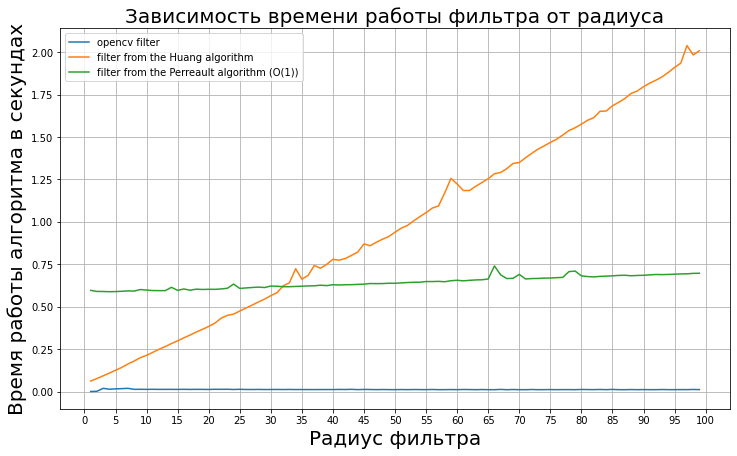

In [54]:
plt.figure(figsize = (12, 7))
plt.plot(grid, cv, label = 'opencv filter')
plt.plot(grid, huang, label = 'filter from the Huang algorithm')
plt.plot(grid, perreault, label = 'filter from the Perreault algorithm (O(1))')
plt.title('Зависимость времени работы фильтра от радиуса', fontsize = 20)
plt.xlabel('Радиус фильтра', fontsize = 20)
plt.xticks(np.linspace(0, 100, 21))
plt.ylabel('Время работы алгоритма в секундах', fontsize = 20)
plt.legend()
plt.grid(True)
plt.show()

Итак, последний алгоритм, Perreault's, по имени первого из авторов статьи, действительно быстрее, но это начинает проявляться с $R \approx 32$. До этого момента Huang's обгоняет его. Безусловно, реализация от opencv намного быстрее написанных мною алгоритмов. 

Из графика видно, что у алгоритма Huang's и правда получилась линейная скорость работы. Моя реализация алгоритма Perreault's всё же не выглядит как константная. Это скорее похоже на линейную сложность с очень маленькой константой или логарифм. Подозреваю, что это из-за природы константы в алгоритме Perreault's: хоть авторы и относят умножение на 256 в константу, но, учитывая ограничение R < 100, данная величина всё же влияет на асиптотику. 

Возможно, при достаточно больших R, кривая начинает куда больше походить на константу. Тем не менее не очень понятно, зачем использовать медианный фильтер с R > 256. Чтобы шум на изображении было невозможно подавить, он должен быть либо очень сильным либо неслучайным, и тут скорее стоит взять другой фильтр, а не пытаться всё увеличивать радиус. Так что в качестве фактической асимптотики уместно назвать логарифм. 

Скорее всего в реализации от opencv использовано ещё какое-нибудь улучшение. Скажем, он могли бы распараллелить алгоритм пересчёта гистограммы и, возможно, даже разделить её столбцы между ядрами процессора. 

**Вывод**: по возможности стоит использовать библиотечную реализацию. Если такой возможности нет: до R = 30 выбираем Huang's, а после R = 35 - Perreault's. При $R \in [30; 35]$ можно выбрать более удобный алгоритм.

**Занимаемая память**:
    
Все используемые алгоритмы где-то должны хранить картинку либо её часть. Я буду считать дополнительную память без учёта хранения картинки.

Реализация через сортировку.

Дополнительно нужно выделить массив, в котором будем искать медианну. Он не может лежать внутри картинки т. к. надо будет его сортировать. Сортировку можно делать in-place (наприме mergesort), либо подсчётом (ссылаясь на то, что 256 - это константа). Т. е. $O((2 * R + 1)^2) = O(R^2)$ дополнительной памяти. 

Huang's

Дополнительно надо хранить только гистограмму. Хоть я и копировала в своём коде часть массивов, я понимаю, что можно аккуратно передать соответствующие указатели или вообще не писать класс и обновлять гистограмму исходя из положения текущего пикселя на картинке. Поэтому дополнительно нужно ещё 256 int-ов и ещё несколько констант на медиану/сумму перед ней. Формально, всё это можно назвать константной памятью, но уже понятно, что для маленьких R такая константа может быть существенной.

Perreault's

Нужно где-то хранить гистограммы столбцов - O(m $\cdot$ R) памяти (256 попало в константу), текущую гистограмму (снова 256 в константе) и несколько дополнительных переменных (медиана, сумма перед ней $\dots$). Формально, считаем, что O(m $\cdot$ R)

**Вывод:** при необходимости экономить память и малом радиусе фильтра( < 35 пикселей ) лучше всего подойдёт аккураьно реализованный алгоритм Huang с наименьшим возможным числом копирований. 